# Breast Cancer Prediction using KDD Methodology
This notebook follows the **KDD process** to explore, preprocess, and build models for breast cancer prediction.

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Step 2: Load and Inspect Data

In [2]:
#upload csv from the local
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
data = pd.read_csv('/content/data.csv')
print(data.head())
print(data.info())
print(data.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Step 3: Data Cleaning

In [4]:
# Drop unnecessary columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)
# Encode diagnosis column
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
print(data['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


# Step 4: Train-Test Split

In [5]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Data Normalization

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Model Training - Random Forest

In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Step 7: Model Training - Logistic Regression

In [8]:
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Step 8: Confusion Matrix Visualization

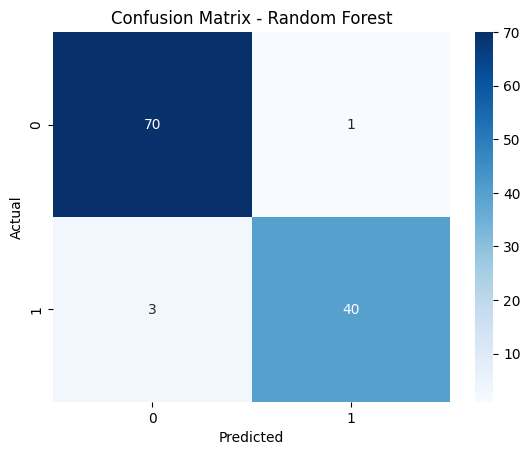

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 9: Model Training - SVM and ROC Curve

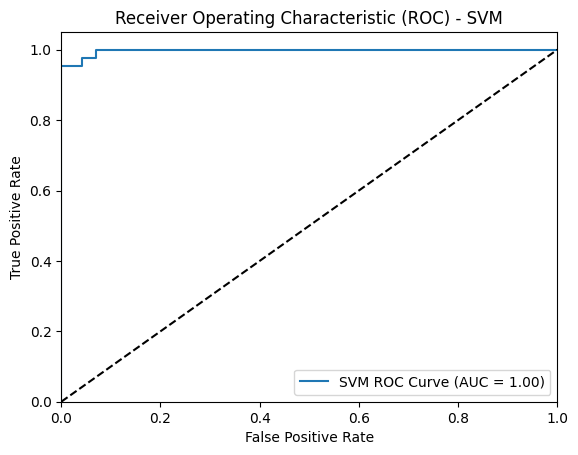

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'SVM ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc="lower right")
plt.show()
